# Couette flow

In [51]:
include("notebook_examples.jl");

In [55]:
q = D2Q9()
ν_lb = 1.0 / 6.0
Nₓ = 16
problem = CouetteFlow(ν_lb, Nₓ)
snapshot_at = [0.01, 0.1, 1.0, 10.0]
snapshots_at =  [0.005, 0.05, 5.0]
snapshots_at =  [0, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

ν = LatticeBoltzmann.viscosity(problem)
Δt = delta_t(problem);
result = simulate(
    problem,
    q,
    t_end = 5.0 / LatticeBoltzmann.viscosity(problem),
    process_method = LatticeBoltzmann.TakeSnapshots(problem, round.(Int, snapshots_at ./ (ν * Δt)) .+ 1),
    initialization_strategy = LatticeBoltzmann.ZeroVelocityInitialCondition()
);

In [54]:
round.(Int, snapshots_at ./ (ν * Δt))

7-element Array{Int64,1}:
    192
    384
   1920
   3840
  19200
  38400
 192000

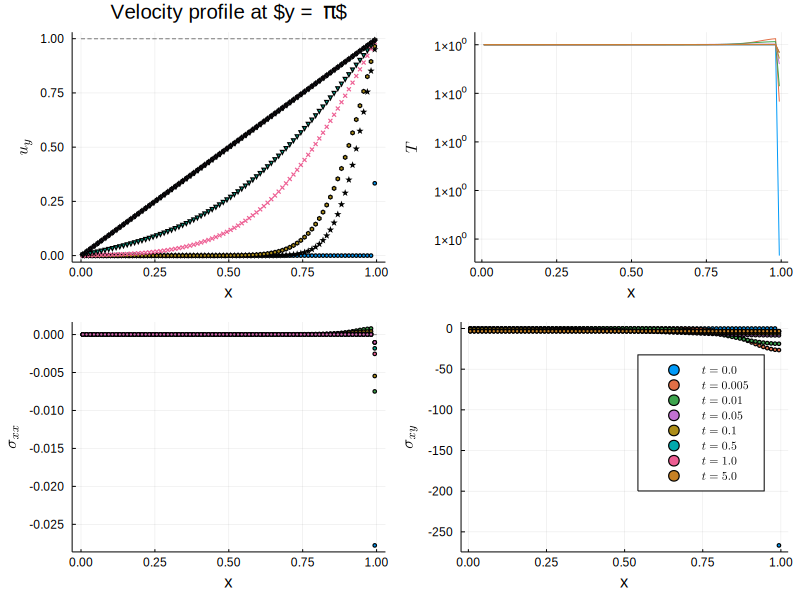

In [56]:
p = LatticeBoltzmann.visualize(result.processing_method, q)
plot!(p.velocity_profile_y, legend = nothing)
# problem
plots = plot_snapshots(problem, result.processing_method.snapshots, snapshots_at, q)

plot(
    plot!(plots.velocity_profile_y, legend = false),
    plot!(plots.temperature_profile, legend = false),
    plot!(plots.sigma_xx_profile, legend = false),
    plots.sigma_xy_profile,
    size=(800, 600),
 #   markrershape = :diamond,
 #   markercolor = :gray,
    markersize = 2,
)